In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [2]:
df=pd.read_csv(r"D:\Anaconda\1-Jupyter\Heart Project\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

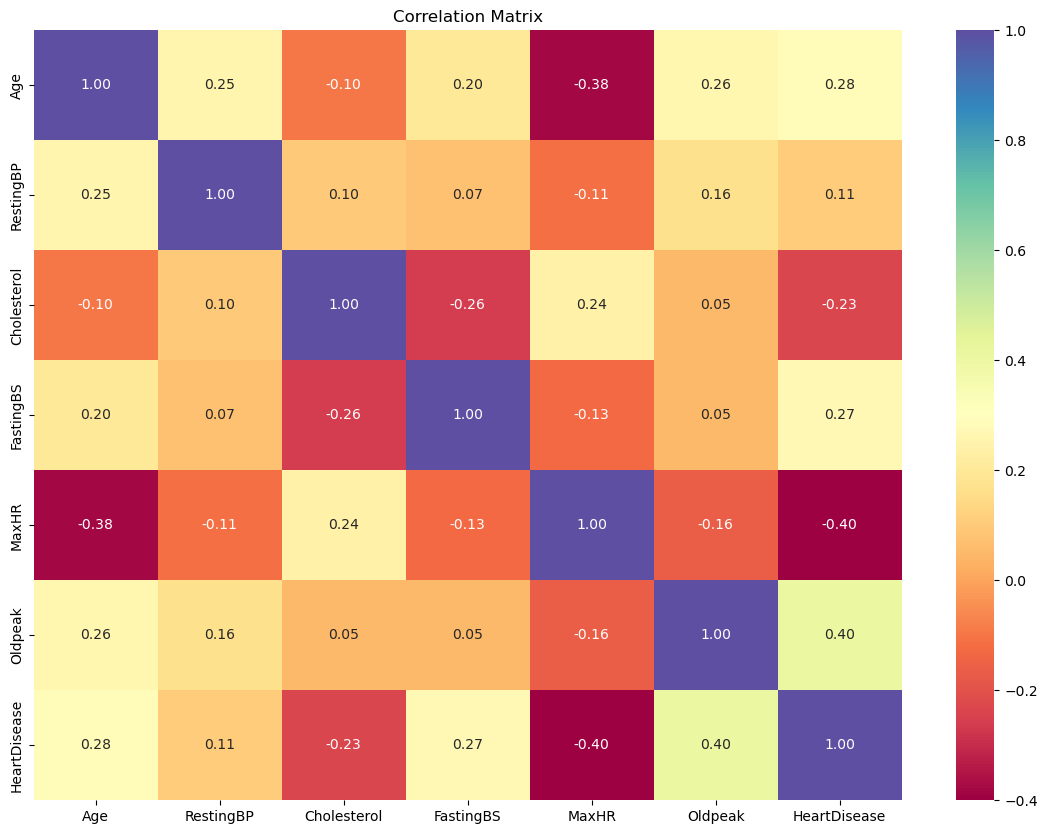

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
print("No.Duplicated=",df.duplicated().sum())

No.Duplicated= 0


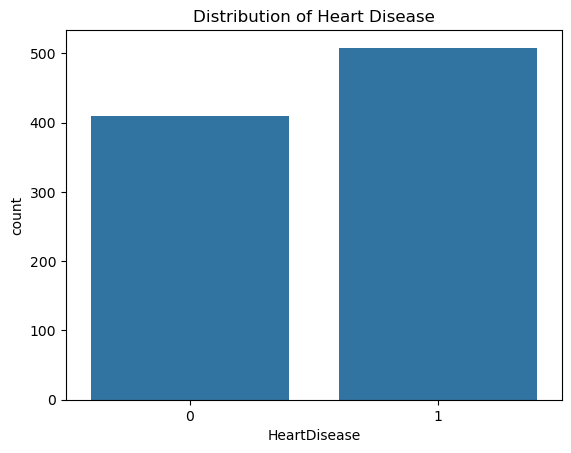

In [8]:
sns.countplot(data=df, x='HeartDisease')
plt.title("Distribution of Heart Disease")
plt.show()

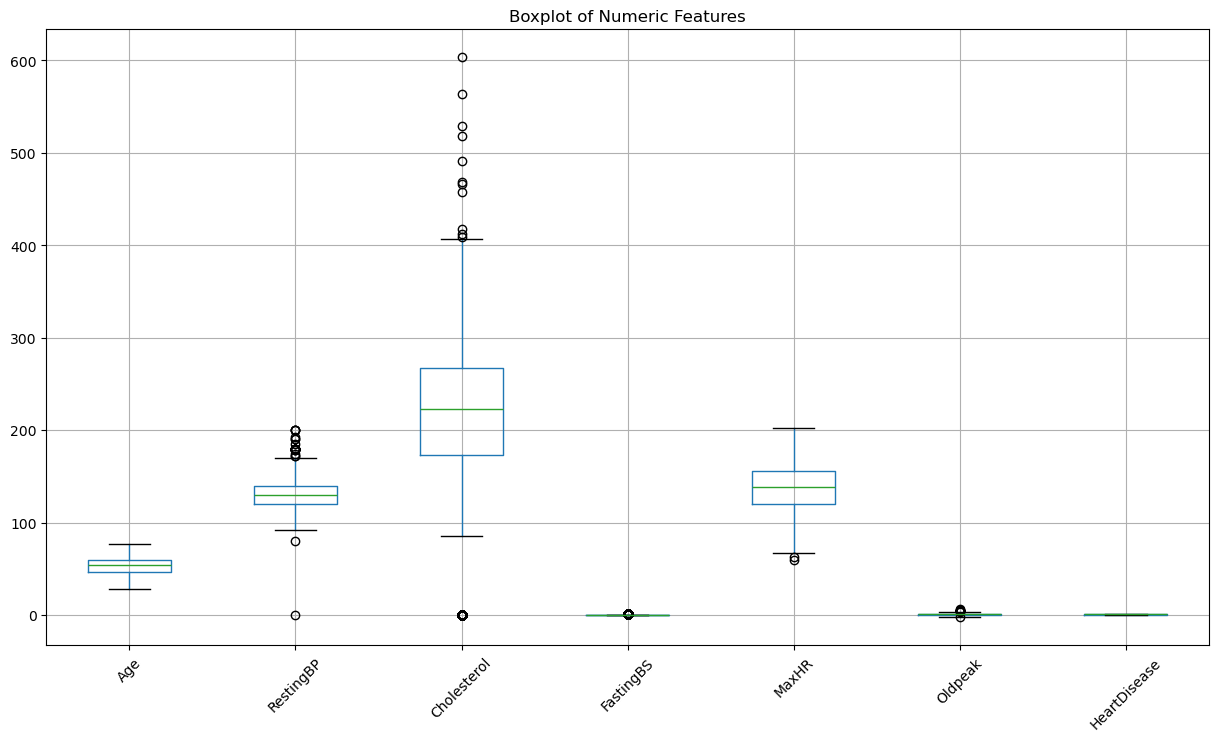

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [10]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

def remove_outliers_iqr(data, columns, multiplier=1.5):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

print("Numeric Features:", num_features)
print("Categorical Features:", cat_features)

Numeric Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical Features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


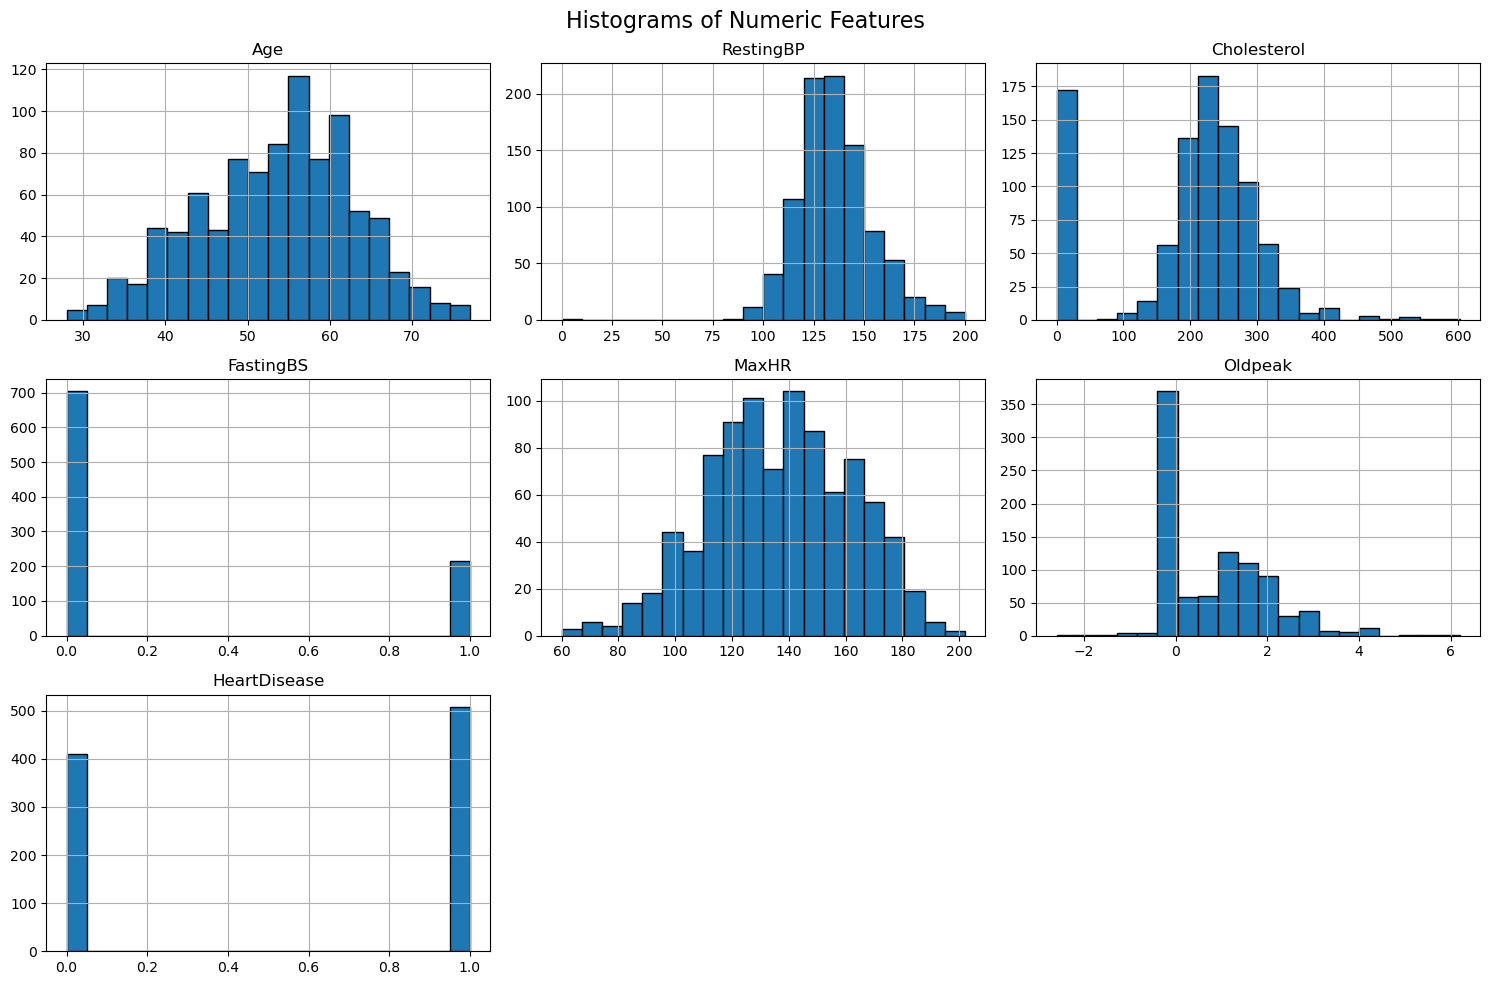

In [11]:
df[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
print("Data Before:", df.shape)
df = remove_outliers_iqr(df, numeric_cols, multiplier=1.5)
print("Data After:", df.shape)

Data Before: (918, 12)
Data After: (587, 12)


In [13]:
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42,max_iter=1000),
    'Lasso (Logistic L1)': LogisticRegression(random_state=42,penalty='l1', solver='liblinear', max_iter=1000),
    'Ridge (Logistic L2)': LogisticRegression(random_state=42,penalty='l2', solver='liblinear', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42,use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
}

In [16]:
results = {}

for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rcl = recall_score(y_test, y_pred)
    results[name] = acc
    results[name] = rcl 
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Recall: {rcl:.4f}")
    print(classification_report(y_test, y_pred))
    print("*********************************************************\n")

Logistic Regression Accuracy: 0.8533
Logistic Regression Recall: 0.8411
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

*********************************************************

Lasso (Logistic L1) Accuracy: 0.8587
Lasso (Logistic L1) Recall: 0.8411
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

*********************************************************

Ridge (Logistic L2) Accuracy: 0.8533
Ridge (Logistic L2) Recall: 0.8411
            

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:36:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8750
XGBoost Recall: 0.8785
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

*********************************************************

SVM Accuracy: 0.8587
SVM Recall: 0.8879
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.87      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

*********************************************************

Naive Bayes Accuracy: 0.8424
Naive Bayes Recall: 0.8037
              precision    recall  f1-score   support

           0       0.77      


Logistic Regression Accuracy: 0.8533

Logistic Regression Recall: 0.8411
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



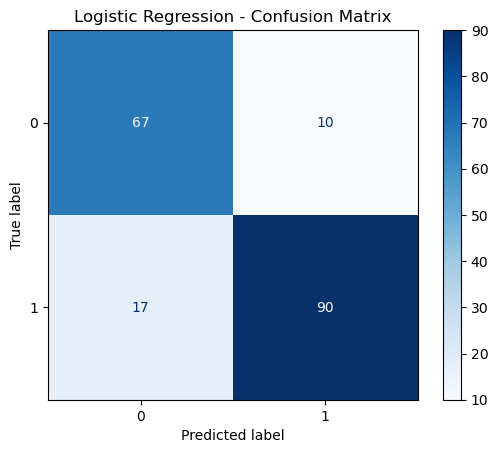


Lasso (Logistic L1) Accuracy: 0.8587

Lasso (Logistic L1) Recall: 0.8411
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



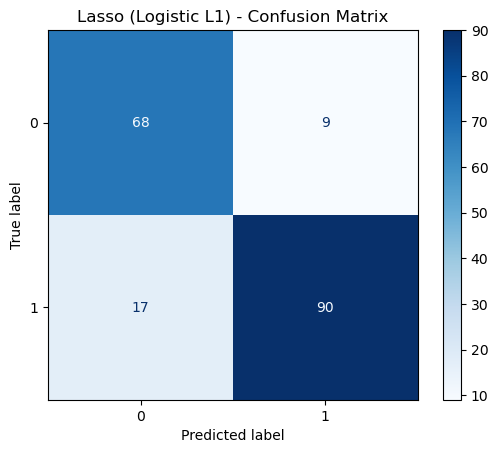


Ridge (Logistic L2) Accuracy: 0.8533

Ridge (Logistic L2) Recall: 0.8411
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



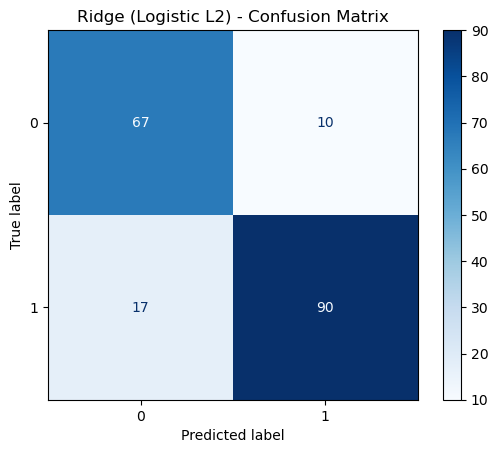


KNN Accuracy: 0.8533

KNN Recall: 0.8224
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



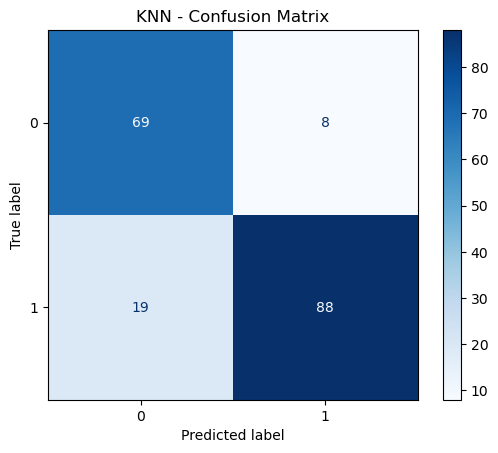


Random Forest Accuracy: 0.8804

Random Forest Recall: 0.8879
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



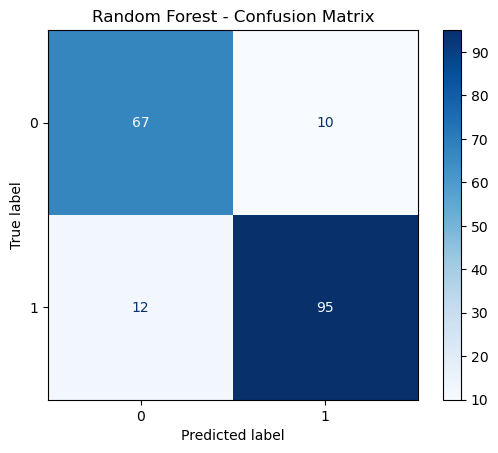


Decision Tree Accuracy: 0.8043

Decision Tree Recall: 0.7757
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



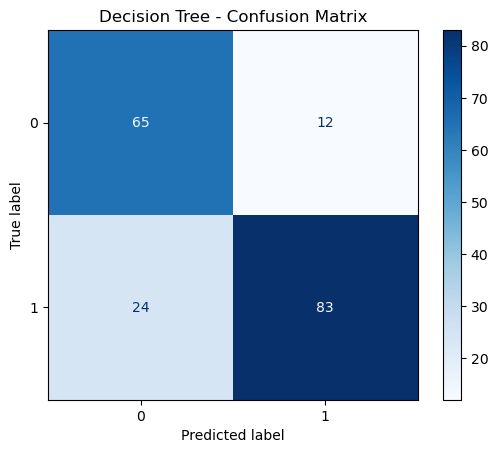

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8750

XGBoost Recall: 0.8785
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



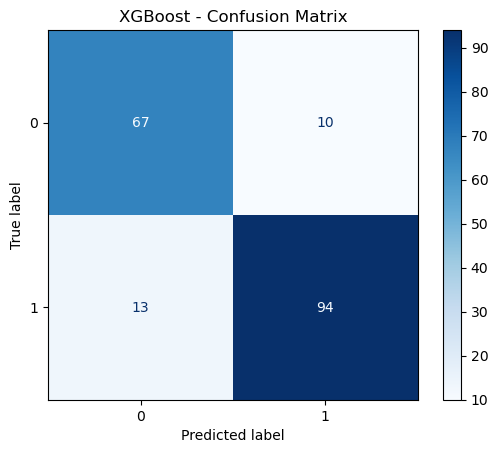


SVM Accuracy: 0.8587

SVM Recall: 0.8879
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.87      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



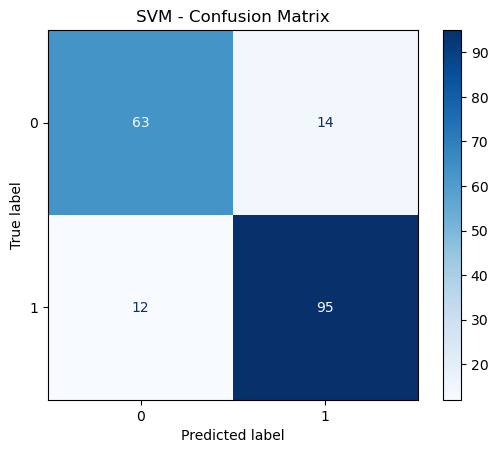


Naive Bayes Accuracy: 0.8424

Naive Bayes Recall: 0.8037
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.91      0.80      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



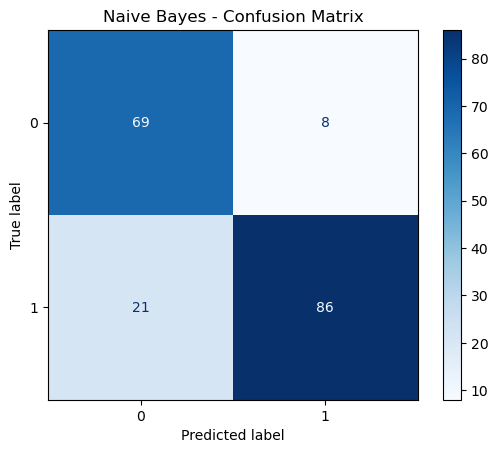

In [17]:
results = {}

for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    rcl = recall_score(y_test, y_pred)
    results[name] = rcl
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"\n{name} Recall: {rcl:.4f}")
    print(classification_report(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_ if hasattr(clf, 'classes_') else [0,1])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

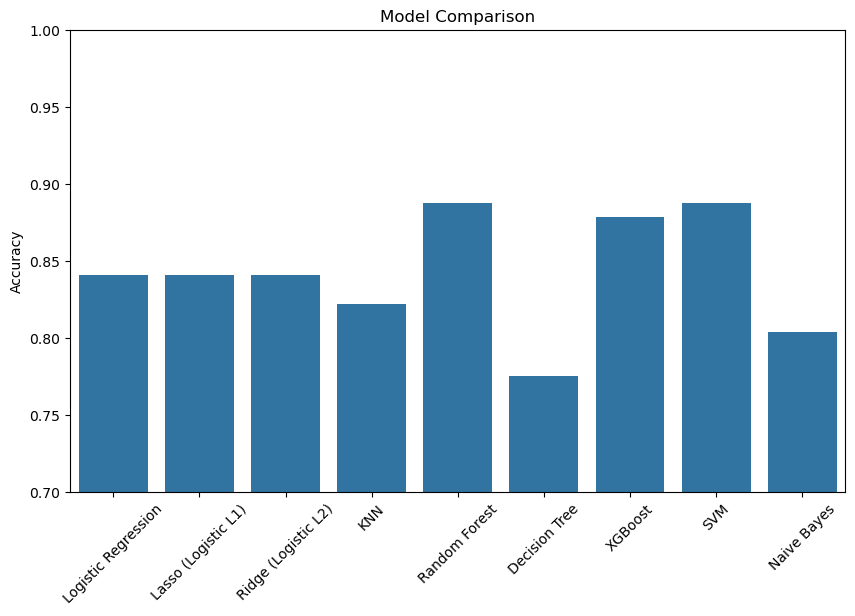

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.7, 1.0)
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [20]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = keras_model.fit(X_train_processed, y_train, epochs=100, batch_size=32,
                          validation_split=0.2, callbacks=[early_stop], verbose=0)

loss, acc = keras_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Keras Neural Network Accuracy: {acc:.4f}")
results['Keras Neural Network'] = acc

loss, rcl = keras_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Keras Neural Network Recall: {rcl:.4f}")
results['Keras Neural Network'] = rcl

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras Neural Network Accuracy: 0.8641
Keras Neural Network Recall: 0.8641


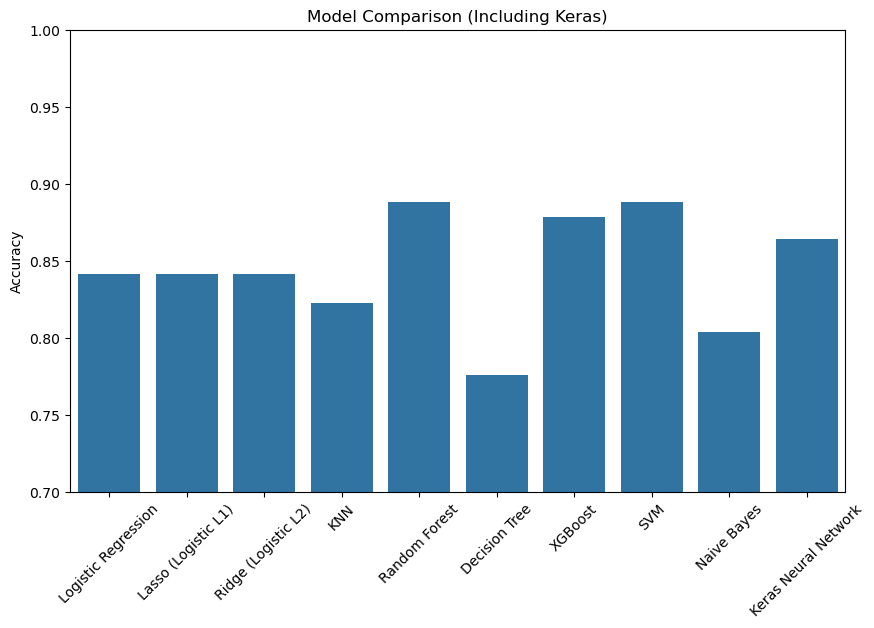

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison (Including Keras)")
plt.ylim(0.7, 1.0)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Keras Neural Network Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



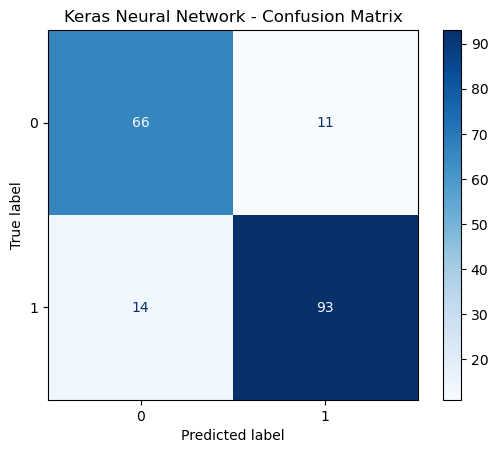

In [22]:
y_pred_keras = (keras_model.predict(X_test_processed) > 0.5).astype("int32")

loss, acc = keras_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"\nKeras Neural Network Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred_keras))

cm_keras = confusion_matrix(y_test, y_pred_keras)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_keras, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Keras Neural Network - Confusion Matrix")
plt.show()

In [23]:
"""
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

results = {}
joblib.dump(preprocessor, 'preprocessor.pkl')
# Loop through scikit-learn models
for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rcl = recall_score(y_test, y_pred)
    results[name] = rcl
    joblib.dump(clf, f"{name}_model.pkl")  # use 'name', not 'model_name'


# Evaluate
y_pred_keras = (keras_model.predict(X_test_processed) > 0.5).astype(int)
rcl_keras = recall_score(y_test, y_pred_keras)
results['Keras Neural Network'] = rcl_keras

# Save keras model
keras_model.save("keras_model.h5")

# Show top 3 by recall
top_3_models = sorted(results.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_3_models)
"""

'\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import recall_score\nimport joblib\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom tensorflow.keras.models import load_model\n\nresults = {}\njoblib.dump(preprocessor, \'preprocessor.pkl\')\n# Loop through scikit-learn models\nfor name, model in models.items():\n    clf = Pipeline([\n        (\'preprocessor\', preprocessor),\n        (\'classifier\', model)\n    ])\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    rcl = recall_score(y_test, y_pred)\n    results[name] = rcl\n    joblib.dump(clf, f"{name}_model.pkl")  # use \'name\', not \'model_name\'\n\n\n# Evaluate\ny_pred_keras = (keras_model.predict(X_test_processed) > 0.5).astype(int)\nrcl_keras = recall_score(y_test, y_pred_keras)\nresults[\'Keras Neural Network\'] = rcl_keras\n\n# Save keras mo

In [24]:
import os
import joblib


os.makedirs("saved_models", exist_ok=True)

for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    joblib.dump(clf, f"saved_models/{name.replace(' ', '_')}.pkl")
    print(f"{name} saved.")

keras_model.save("saved_models/keras_model.h5")
print("Keras Neural Network saved.")


Logistic Regression saved.
Lasso (Logistic L1) saved.
Ridge (Logistic L2) saved.
KNN saved.


D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest saved.
Decision Tree saved.
XGBoost saved.
SVM saved.
Naive Bayes saved.
Keras Neural Network saved.


In [25]:
import joblib
from tensorflow.keras.models import load_model

logistic_model = joblib.load("saved_models/Logistic_Regression.pkl")
random_forest_model = joblib.load("saved_models/Random_Forest.pkl")
xgboost_model = joblib.load("saved_models/XGBoost.pkl")

keras_model = load_model("saved_models/keras_model.h5")

y_pred = logistic_model.predict(X_test)

joblib.dump(model, "saved_models/Random_Forest.pkl")
joblib.dump(model, "saved_models/SVM.pkl")
joblib.dump(model, "saved_models/XGBoost.pkl")
keras_model.save("saved_models/keras_model.h5")

In [26]:
import os
print("saved_models:")
print(os.listdir("saved_models"))

saved_models:
['Decision_Tree.pkl', 'keras_model.h5', 'KNN.pkl', 'Lasso_(Logistic_L1).pkl', 'Logistic_Regression.pkl', 'Naive_Bayes.pkl', 'Random_Forest.pkl', 'Ridge_(Logistic_L2).pkl', 'SVM.pkl', 'XGBoost.pkl']


In [27]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import random

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

st.title("Top 3 Heart Disease Predictors")

uploaded_file = st.file_uploader("Upload your CSV file", type=['csv'])

def remove_outliers_iqr(data, columns, multiplier=1.5):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def build_keras_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
    return model

@st.cache_data
def load_and_train_models(file):
    df = pd.read_csv(file)
    df = remove_outliers_iqr(df, df.select_dtypes(include=['int64', 'float64']).columns)
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=SEED),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=SEED),
        'Random Forest': RandomForestClassifier(random_state=SEED),
        'SVM': SVC(probability=True, random_state=SEED),
        'Naive Bayes': GaussianNB(),
        'Ridge Classifier': RidgeClassifier(random_state=SEED),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED)
    }

    results = []

    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        recall = recall_score(y_test, y_pred)
        results.append((name, recall, pipeline))

    # Neural Network
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    keras_model = build_keras_model(X_train_processed.shape[1])
    keras_model.fit(X_train_processed, y_train, epochs=50, validation_split=0.2, verbose=0)
    y_pred_keras = (keras_model.predict(X_test_processed) > 0.5).astype("int32")
    keras_recall = recall_score(y_test, y_pred_keras)
    results.append(("Neural Network", keras_recall, (preprocessor, keras_model)))

    results.sort(key=lambda x: x[1], reverse=True)
    top3 = results[:3]

    return top3, numeric_features, categorical_features, X

if uploaded_file:
    top3, numeric_features, categorical_features, X_example = load_and_train_models(uploaded_file)

    st.subheader("Top 3 Models by Recall Score:")
    for name, recall, _ in top3:
        st.write(f"**{name}**: Recall = {recall:.4f}")

    st.subheader("Make a Prediction")
    input_data = {}
    for col in numeric_features:
        input_data[col] = st.number_input(f"{col}", value=float(X_example[col].mean()))
    for col in categorical_features:
        input_data[col] = st.selectbox(f"{col}", options=X_example[col].dropna().unique())

    if st.button("Predict"):
        input_df = pd.DataFrame([input_data])
        st.write("Predictions:")
        for name, _, model in top3:
            if name == "Neural Network":
                preprocessor, nn_model = model
                input_transformed = preprocessor.transform(input_df)
                pred = (nn_model.predict(input_transformed) > 0.5).astype("int32")[0][0]
            else:
                pred = model.predict(input_df)[0]
            st.write(f"{name}: {'Heart Disease' if pred == 1 else 'No Heart Disease'}")

2025-05-10 07:36:54.533 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-10 07:36:54.533 No runtime found, using MemoryCacheStorageManager
